# Graph Learning Implementation

그래프 표현과 검색 알고리즘을 포함해 이 장에서 설명한 그래프 개념을 구현한다.

In [1]:
from typing import Dict, List, Set, Optional
from collections import defaultdict, deque
import warnings
warnings.filterwarnings('ignore')

## 1. Graph Representation Class
Adjacency List와 Matrix Representations을 모두 지원하는 그래프 클래스 구현

In [2]:
class Graph:
    def __init__(self, directed: bool = False):
        self.directed = directed
        self.adj_list: Dict[str, List[str]] = defaultdict(list)
        self.adj_matrix: Dict[tuple, int] = {}
        self.vertices: Set[str] = set()
    
    def add_edge(self, v1: str, v2: str) -> None:
        """Add edge between vertices v1 and v2"""
        self.vertices.add(v1)
        self.vertices.add(v2)
        self.adj_list[v1].append(v2)
        self.adj_matrix[(v1, v2)] = 1
        
        if not self.directed:
            self.adj_list[v2].append(v1)
            self.adj_matrix[(v2, v1)] = 1
    
    def get_neighbors(self, vertex: str) -> List[str]:
        """Get all neighbors of a vertex"""
        return self.adj_list[vertex]
    
    def edge_exists(self, v1: str, v2: str) -> bool:
        """Check if edge exists between v1 and v2"""
        return (v1, v2) in self.adj_matrix

## 2. Search Algorithms Implementation
BFS와 DFS 알고리즘 구현

In [3]:
def bfs(graph: Graph, start: str, target: Optional[str] = None) -> Dict[str, int]:
    """Perform BFS traversal and return distances from start node"""
    visited = set()
    distances = {start: 0}
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex == target:
            return distances
            
        for neighbor in graph.get_neighbors(vertex):
            if neighbor not in distances:  # Check if not already discovered
                queue.append(neighbor)
                distances[neighbor] = distances[vertex] + 1
        
        visited.add(vertex)
    
    return distances

def dfs(graph: Graph, start: str, visited: Optional[Set[str]] = None) -> Set[str]:
    """Perform DFS traversal and return set of visited nodes"""
    if visited is None:
        visited = set()
    
    visited.add(start)
    
    for neighbor in graph.get_neighbors(start):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    
    return visited

## 3. Second Degree Connection Check Implementation

In [4]:
def is_second_degree_connection(graph: Graph, user1: str, user2: str) -> bool:
    """Check if user2 is a second-degree connection of user1"""
    distances = bfs(graph, user1)
    return distances.get(user2) == 2

## 4. Example Usage and Testing

In [5]:
# Create social network graph from the chapter example
social_graph = Graph(directed=False)

# Add connections from the example
social_graph.add_edge("john", "alex")
social_graph.add_edge("alex", "greg")
social_graph.add_edge("greg", "mary")
social_graph.add_edge("mary", "alex")

# Test cases
print("2단계(Second-degree) 연결::")
print(f"마리와 존은 2촌 관계인가? {is_second_degree_connection(social_graph, 'john', 'mary')}")
print(f"알렉스의 관계: {social_graph.get_neighbors('alex')}")

# Test BFS
print("\n존으로 부터 BFS distances:")
distances = bfs(social_graph, "john")
print(f"존으로 부터 모든 노드 거리: {distances}")

# Test DFS
print("\nJohn에서 DFS 트래버스 테스트:")
visited_nodes = dfs(social_graph, "john")
print(f"DFS에서 방문한 노드: {visited_nodes}")

2단계(Second-degree) 연결::
마리와 존은 2촌 관계인가? True
알렉스의 관계: ['john', 'greg', 'mary']

존으로 부터 BFS distances:
존으로 부터 모든 노드 거리: {'john': 0, 'alex': 1, 'greg': 2, 'mary': 2}

John에서 DFS 트래버스 테스트:
DFS에서 방문한 노드: {'mary', 'alex', 'greg', 'john'}


## 5. Visualize the social graph

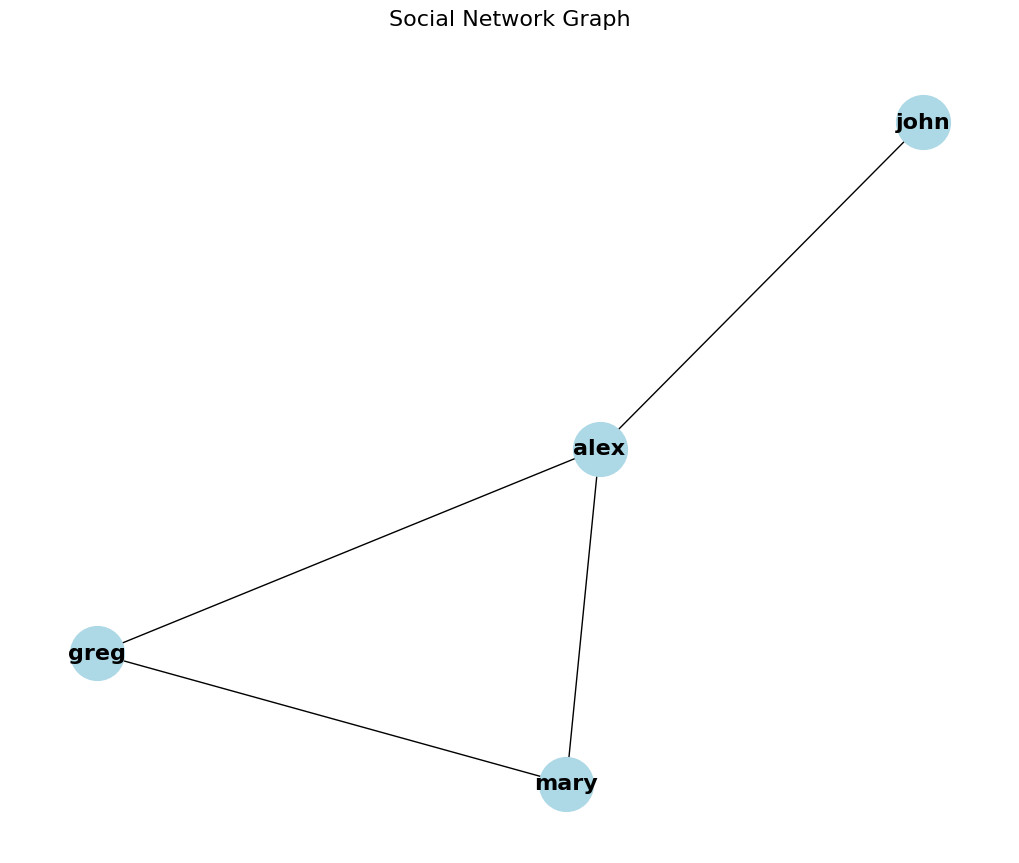

In [6]:
#visualize the social graph
import networkx as nx
import matplotlib.pyplot as plt

# Create NetworkX graph from our social graph
G = nx.Graph()
for v1 in social_graph.vertices:
    for v2 in social_graph.get_neighbors(v1):
        G.add_edge(v1, v2)

# Set up the plot
plt.figure(figsize=(10, 8))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=16, font_weight='bold')

# Add edge labels
edge_labels = {(u, v): '' for (u, v) in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Social Network Graph", fontsize=16, pad=20)
plt.axis('off')
plt.show()
